# Bayesian Model Mixing (BMM): Strong and weak coupling expansions

## Alexandra Semposki

### Date: 23 July 2021

In this notebook, I implement the class __Mixing__ and check to see what kind of results I can get with the orders ks = 5 and kl = 23. In the final version of this class/notebook/project, this should all be written into a package that a user can play with.

In [1]:
#import standard packages
import numpy as np
from scipy import special, integrate, stats
import math as math
import time as time
import matplotlib.pyplot as plt
%matplotlib inline

#import the class
from class_expansions import Mixing, Switching

In [2]:
#run the class initialization to make sure it works
g_true = np.linspace(1e-6, 0.5, 100)
g_data = np.linspace(0.10, 0.2, 20)
loworder = np.array([5, 10, 20])
highorder = np.array([5, 10, 20])

first = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [3]:
#call the calculations for low and high g
result_low = first.low_g(g_true, loworder)
result_high = first.high_g(g_true, highorder)

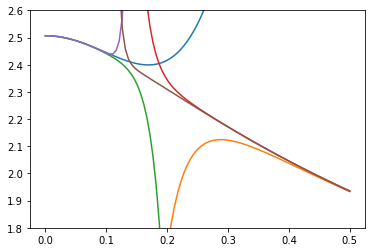

In [4]:
#checking the expansions to make sure the functions work
fig = plt.figure()
ax = plt.axes()
ax.set_ylim(1.8,2.6)
for i in range(3):
    plt.plot(g_true, result_low[i])
    plt.plot(g_true, result_high[i])

[ 5 10 20]


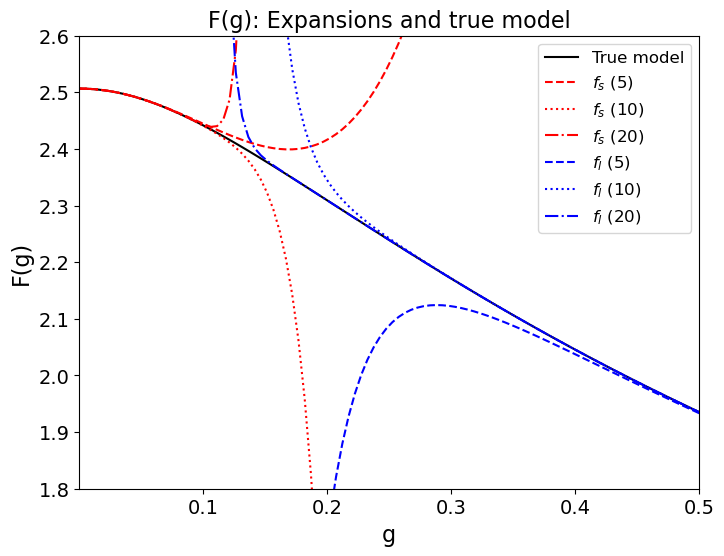

In [5]:
#running the plotting function to see how well it plots
print(loworder)
first.plot_models(g_true, loworder, highorder)

In [6]:
#now checking that multiple arrays will work
nlowk = np.array([5, 23, 50])
nhighk = np.array([5, 23, 50])

In [7]:
second = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [8]:
result_nlow = second.low_g(g_true, nlowk)

In [9]:
print(result_nlow)

[[ 2.50662827e+00  2.50643647e+00  2.50586224e+00  2.50490866e+00
   2.50358088e+00  2.50188608e+00  2.49983352e+00  2.49743449e+00
   2.49470235e+00  2.49165252e+00  2.48830246e+00  2.48467169e+00
   2.48078180e+00  2.47665641e+00  2.47232121e+00  2.46780395e+00
   2.46313441e+00  2.45834446e+00  2.45346799e+00  2.44854097e+00
   2.44360142e+00  2.43868941e+00  2.43384706e+00  2.42911856e+00
   2.42455014e+00  2.42019009e+00  2.41608876e+00  2.41229855e+00
   2.40887392e+00  2.40587137e+00  2.40334948e+00  2.40136886e+00
   2.39999219e+00  2.39928419e+00  2.39931167e+00  2.40014344e+00
   2.40185042e+00  2.40450556e+00  2.40818384e+00  2.41296235e+00
   2.41892018e+00  2.42613852e+00  2.43470058e+00  2.44469165e+00
   2.45619906e+00  2.46931220e+00  2.48412252e+00  2.50072351e+00
   2.51921074e+00  2.53968180e+00  2.56223636e+00  2.58697615e+00
   2.61400493e+00  2.64342854e+00  2.67535486e+00  2.70989383e+00
   2.74715744e+00  2.78725974e+00  2.83031684e+00  2.87644689e+00
   2.92577

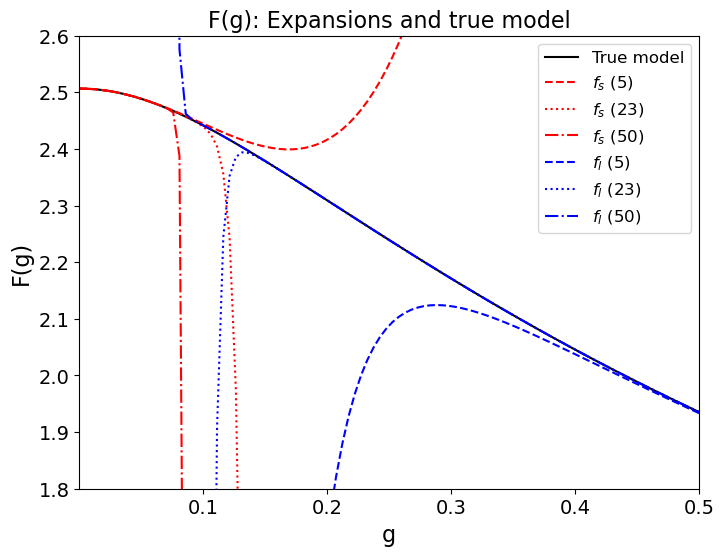

In [10]:
second.plot_models(g_true, nlowk, nhighk)

What percent error would you like on your data (please enter a decimal)?0.01


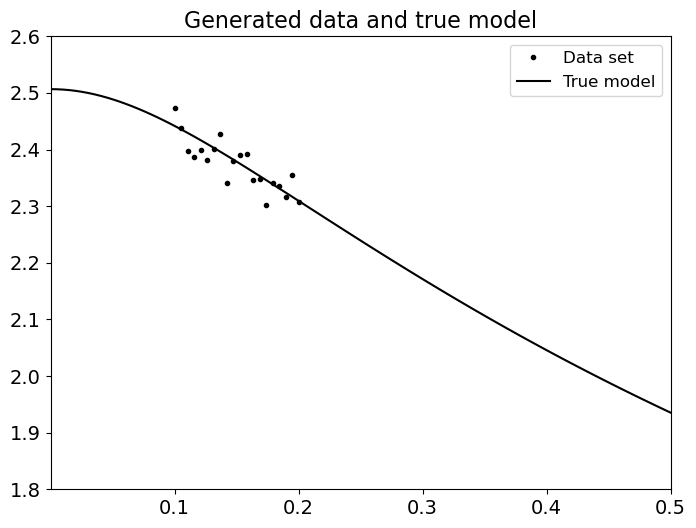

Data set:  [2.4732554  2.43827315 2.39735648 2.38710784 2.3999926  2.38234486
 2.4009556  2.42659837 2.34176835 2.37984201 2.39042576 2.39160958
 2.34590011 2.34740944 2.30126993 2.34041409 2.33529846 2.31700217
 2.3552755  2.30756973]
Standard deviations:  [0.02473255 0.02438273 0.02397356 0.02387108 0.02399993 0.02382345
 0.02400956 0.02426598 0.02341768 0.02379842 0.02390426 0.0239161
 0.023459   0.02347409 0.0230127  0.02340414 0.02335298 0.02317002
 0.02355275 0.0230757 ]


In [11]:
data, sigma = second.generate_data(g_true, g_data)

print('Data set: ', data)
print('Standard deviations: ', sigma)

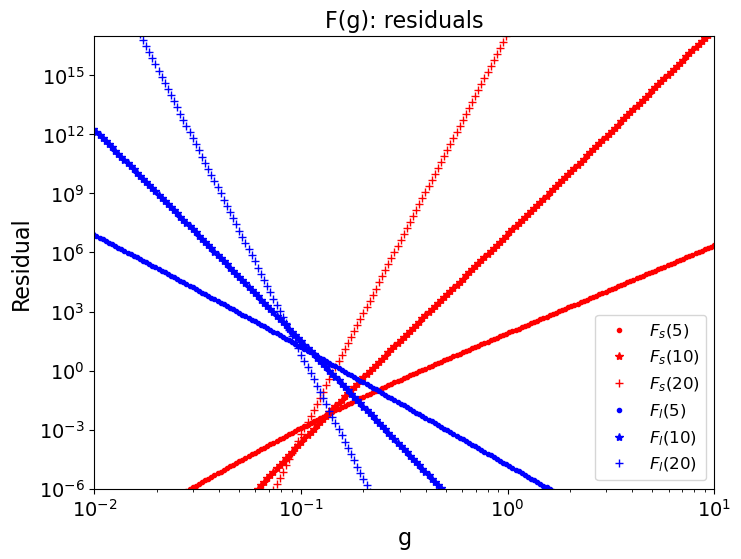

In [12]:
second.residuals(loworder, highorder)

In [13]:
#check functionality of likelihoods in the class
one = second.likelihood_low(g_data, data, sigma, loworder)
two = second.likelihood_high(g_data, data, sigma, highorder)

print('Small-g likelihoods: {} \n\nLarge-g likelihoods: {}'.format(one, two))

Small-g likelihoods: [[8.24001506e+000 1.63422286e+001 5.04220764e+000 3.46267388e+000
  9.78832175e+000 4.75548640e+000 1.36963295e+001 1.37047225e+001
  2.96048780e-001 9.42415052e+000 1.45763929e+001 1.54571549e+001
  1.22580653e+000 1.48947045e+000 1.90355987e-003 6.13138147e-001
  2.56069362e-001 1.02984387e-002 1.06177087e+000 2.56275639e-004]
 [6.88989161e+000 1.61629627e+001 7.55640398e+000 6.50038038e+000
  1.48033432e+001 1.18804411e+001 1.52715866e+001 2.20992732e+000
  1.17496400e+001 4.71102023e+000 1.39269053e-001 6.35550493e-004
  8.13600897e-004 9.19552887e-010 7.21405908e-014 4.01773198e-040
  2.09814351e-075 1.73161419e-133 2.88522787e-260 0.00000000e+000]
 [7.59758166e+000 1.63459918e+001 3.46611666e+000 4.90279939e-001
  2.88109212e-002 7.34756718e-014 5.71465122e-056 2.38608981e-254
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.0

Now we want to calculate the results of the mixed model for two specific orders: a small-g expansion up to 5th order, and a large-g expansion up to 23rd order.

In [14]:
low = np.array([5])
high = np.array([23])

In [15]:
trace = second.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g3: 0.16
Enter a guess for the standard deviation of the parameter g3: 0.01
Using 10 walkers with 1000 steps each, for a total of 10000 samples.
Calculation finished!
Duration = 37 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.


In [16]:
print(trace)

[0.15063943 0.15221883 0.155037   ... 0.14644582 0.14500831 0.14070491]


In [17]:
#print the mean of the trace
mean_g3 = np.mean(trace.T)
print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g3 = second.credible_intervals(trace, 0.95)
print('Credible interval, g3: {}'.format(ci_g3))

Mean of g3: 0.1522096824536211
Credible interval, g3: [0.1355668  0.17003976]


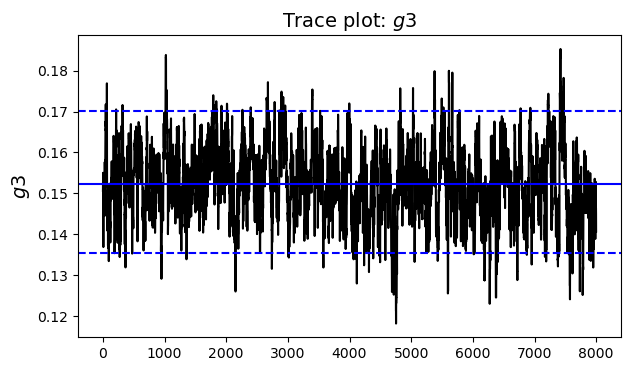

In [18]:
#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig = plt.figure(figsize=(7,4*1), dpi=100)
ax = plt.axes()

ax.plot(trace.T, 'k')
ax.set_ylabel(r'$g3$', fontsize=14)
ax.set_title(r'Trace plot: $g3$', fontsize=14)

ax.axhline(y=mean_g3, color='b', linestyle='solid')
ax.axhline(y=ci_g3[0], color='b', linestyle='dashed')
ax.axhline(y=ci_g3[1], color='b', linestyle='dashed')

In [19]:
g_ppd = np.linspace(1e-6, 0.5, 100)

In [20]:
#calculate the ppd with intervals
switch_results_ppd = second.ppd_cos(0.10, 0.20, trace, g_ppd, low, high)

switch_mean_results = np.empty([len(g_ppd)])
switch_g_intervals = np.empty([len(g_ppd), 2])

for i in range(len(g_ppd)):
    switch_mean_results[i] = np.mean(switch_results_ppd[i,:])
    switch_g_intervals[i, :] = second.credible_intervals(switch_results_ppd[i,:], 0.95)

The above plot looks pretty good! Now on to changing things up and writing a plotting function!

Enter the minimum g to plot.0.05
Enter the maximum g to plot.0.25


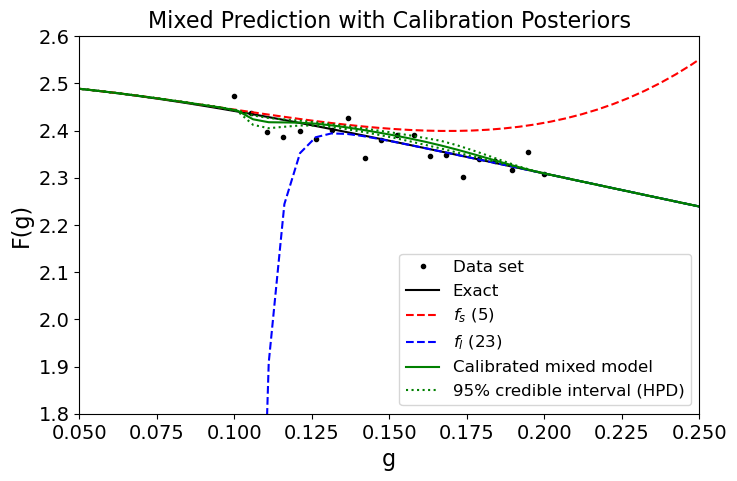

Would you like to save the plot to a file (yes/no)?yes
Enter a file name to use (include file type as .png, .pdf, etc.).test.png


In [22]:
second.plot_ppd(g_data, g_true, g_ppd, data, switch_mean_results, switch_g_intervals, 95, low, high)

The plot saves correctly now, after the user is able to see it to determine whether they wish to keep it in a file or not, which is exactly what is needed here. 